# cryoCARE odd-and_even registered
N2N (Noise2Noise) denoising del volumen empiar10311. Utiliza 4 volúmenes:

1. $V_1$, con los planos Z pares ("even").
2. $V_2$, con los planos Z impares ("odd").
3. $V_3$, con los slices Z impares proyectados sobre los slices pares.
4. $V_4$, con los slices Z pares proyectados sobre los slices impares.

Todos los ficheros temporales se crean en `/nas/vruiz/cryoCARE/empiar10311`.

## Creamos $V_2$
El volumen "odd" proyectado. Para ello usamos los volúmenes even y odd ya generados previsamente en el experimento cryoCARE__even_odd.ipynb.

Projecting Slices:   0%|          | 0/54 [00:00<?, ?it/s]


Optical flow calculation and projection complete.


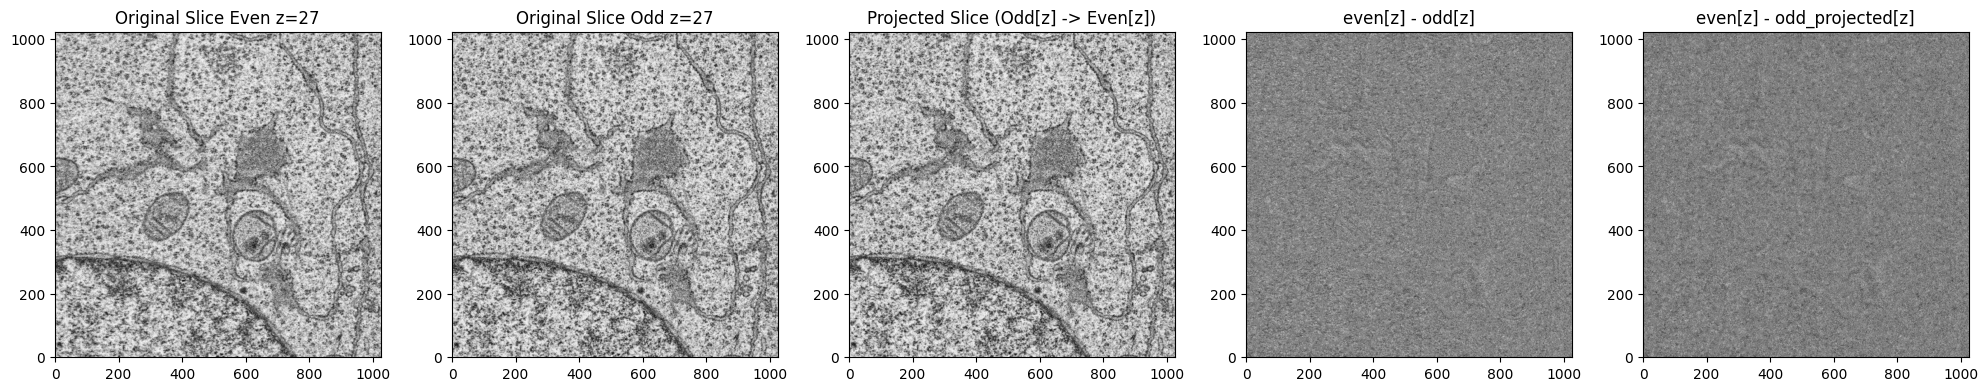

Writing /nas/vruiz/cryoCARE/empiar10311/odd_registered.mrc
done
-rw-r----- 1 jupyter-vruiz jupyter-vruiz 226493440 oct 22 23:59 /nas/vruiz/cryoCARE/empiar10311/odd_registered.mrc


Projecting Slices:   0%|          | 0/54 [00:00<?, ?it/s]


Optical flow calculation and projection complete.


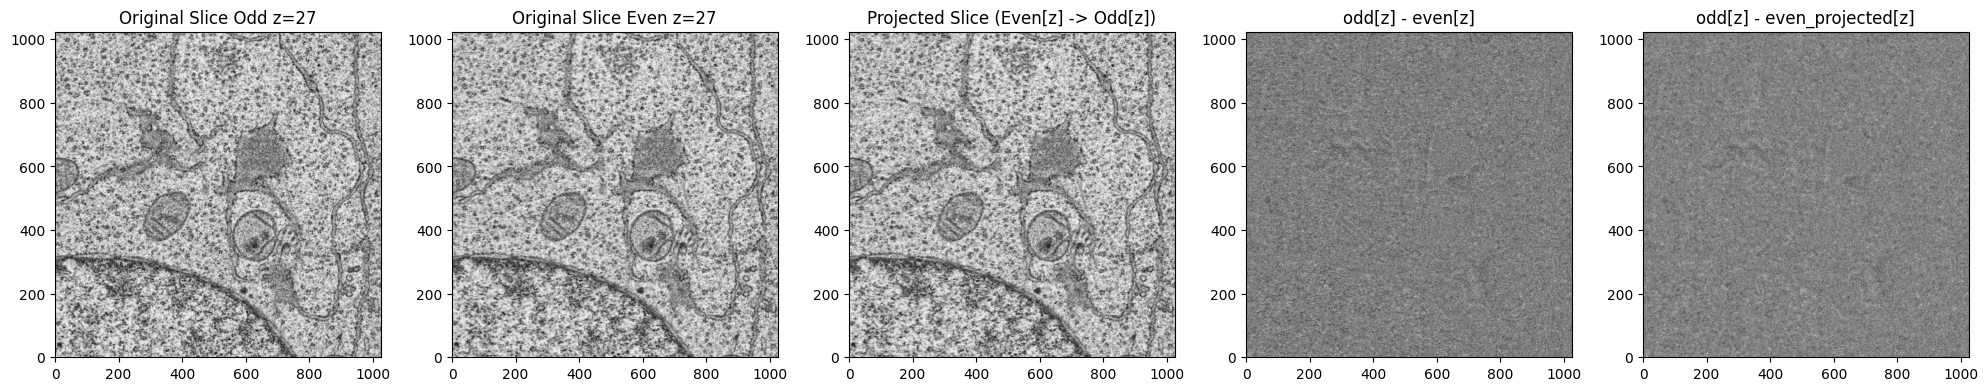

Writing /nas/vruiz/cryoCARE/empiar10311/even_registered.mrc
done
-rw-r----- 1 jupyter-vruiz jupyter-vruiz 226493440 oct 22 23:59 /nas/vruiz/cryoCARE/empiar10311/even_registered.mrc


In [1]:
%run project_odd_even_and_viceversa.ipynb

## Configuramos cryoCARE

In [2]:
%%writefile /nas/vruiz/cryoCARE/empiar10311/train_data_config__odd_even_registered.json
{
    "even": ["even.mrc", "odd_registered.mrc"],
    "odd": ["even_registered.mrc", "odd.mrc"],
    "mask": [""],
    "patch_shape": [16, 16, 16],
    "num_slices": 800,
    "split": 0.9,
    "tilt_axis": "Y",
    "n_normalization_samples": 200,
    "path": "./odd_even_registered_data",
    "overwrite": "True"  
}

Writing /nas/vruiz/cryoCARE/empiar10311/train_data_config__odd_even_registered.json


In [3]:
%%bash
cd /nas/vruiz/cryoCARE/empiar10311
source ~/envs/cryoCARE/bin/activate
cryoCARE_extract_train_data.py --conf train_data_config__odd_even_registered.json

2025-10-22 23:59:40.390728: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


even.data.shape=(54, 1024, 1024), sample_shape=[16, 16, 16]
even.data.shape=(54, 1024, 1024), sample_shape=[16, 16, 16]
Computing normalization parameters:


100%|██████████| 200/200 [00:00<00:00, 5949.24it/s]


## Entrenamos

In [6]:
%%writefile /nas/vruiz/cryoCARE/empiar10311/train_config__odd_even_registered.json
{
  "train_data": "./odd_even_registered_data",
  "epochs": 50,
  "steps_per_epoch": 200,
  "batch_size": 16,
  "unet_kern_size": 3,
  "unet_n_depth": 3,
  "unet_n_first": 16,
  "learning_rate": 0.0004,
  "model_name": "model",
  "path": "./",
  "gpu_id": [1]
}

Overwriting /nas/vruiz/cryoCARE/empiar10311/train_config__odd_even_registered.json


In [7]:
%%bash
cd /nas/vruiz/cryoCARE/empiar10311
source ~/envs/cryoCARE/bin/activate
cryoCARE_train.py --conf train_config__odd_even_registered.json

2025-10-23 00:02:48.971709: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-10-23 00:02:54.162575: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-10-23 00:02:54.163315: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-10-23 00:02:54.181505: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-23 00:02:54.182791: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A30 computeCapability: 8.0
coreClock: 1.44GHz coreCount: 56 deviceMemorySize: 23.60GiB deviceMemoryBandwidth: 869.04GiB/s
2025-10-23 00:02:54.182860: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

Looking for GPU with ID: 1
GPU 1 successfully found
0 1
1 16
2 16
3 16
4 1
Epoch 1/50


2025-10-23 00:02:57.901786: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2025-10-23 00:02:59.301024: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2025-10-23 00:02:59.371836: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2025-10-23 00:03:00.235557: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2025-10-23 00:03:00.526830: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2025-10-23 00:03:30.226359: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:656] In AUTO-mode, and switching to DATA-based sharding, instead of FILE-based sharding 

200/200 [==============================] - 50s 91ms/step - loss: 0.5122 - mse: 0.5122 - mae: 0.5386 - val_loss: 0.4481 - val_mse: 0.4481 - val_mae: 0.5257
Epoch 2/50
200/200 [==============================] - 3s 16ms/step - loss: 0.4154 - mse: 0.4154 - mae: 0.5036 - val_loss: 0.4399 - val_mse: 0.4399 - val_mae: 0.5229
Epoch 3/50
200/200 [==============================] - 3s 16ms/step - loss: 0.4093 - mse: 0.4093 - mae: 0.5009 - val_loss: 0.4368 - val_mse: 0.4368 - val_mae: 0.5213
Epoch 4/50
200/200 [==============================] - 3s 16ms/step - loss: 0.4068 - mse: 0.4068 - mae: 0.4994 - val_loss: 0.4373 - val_mse: 0.4373 - val_mae: 0.5224
Epoch 5/50
200/200 [==============================] - 3s 16ms/step - loss: 0.4057 - mse: 0.4057 - mae: 0.4987 - val_loss: 0.4351 - val_mse: 0.4351 - val_mae: 0.5197
Epoch 6/50
200/200 [==============================] - 3s 17ms/step - loss: 0.4062 - mse: 0.4062 - mae: 0.4988 - val_loss: 0.4356 - val_mse: 0.4356 - val_mae: 0.5209
Epoch 7/50
200/200 [

/home/jupyter-vruiz/envs/cryoCARE/lib/python3.8/site-packages/csbdeep/models/base_model.py:149: UserWarning: output path for model already exists, files may be overwritten: /nas/vruiz/cryoCARE/empiar10311/model
  warnings.warn('output path for model already exists, files may be overwritten: %s' % str(self.logdir.resolve()))



Loading network weights from 'weights_best.h5'.


## Inferimos

In [8]:
%%writefile /nas/vruiz/cryoCARE/empiar10311/predict_config__odd_even_registered.json
{
    "path": "./model.tar.gz",
    "even": ["empiar10311_stack_crop.mrc"], 
    "odd": ["empiar10311_stack_crop.mrc"],
    "n_tiles": [1,1,1],
    "output": "odd_even_registered_denoised",
    "overwrite": "True",
    "gpu_id": [1]
}

Writing /nas/vruiz/cryoCARE/empiar10311/predict_config__odd_even_registered.json


In [9]:
%%bash
cd /nas/vruiz/cryoCARE/empiar10311
pwd
source ~/envs/cryoCARE/bin/activate
cryoCARE_predict.py --conf predict_config__odd_even_registered.json || true

/nas/vruiz/cryoCARE/empiar10311


2025-10-23 00:06:38.287966: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-10-23 00:06:43.421175: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-10-23 00:06:43.421952: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-10-23 00:06:43.440908: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-23 00:06:43.442193: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A30 computeCapability: 8.0
coreClock: 1.44GHz coreCount: 56 deviceMemorySize: 23.60GiB deviceMemoryBandwidth: 869.04GiB/s
2025-10-23 00:06:43.442260: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

Looking for GPU with ID: 1
GPU 1 successfully found
Loading network weights from 'weights_best.h5'.
(104, 1024, 1024, 1)
Out of memory, retrying with n_tiles = (1, 1, 2, 1)


100%|██████████| 2/2 [00:05<00:00,  2.69s/it]    


['NEWSTACK: Images copied                                  6-May-22  11:43:36     '
 'NEWSTACK: Images copied                                  6-May-22  11:46:44     '
 '' '' '' '' '' ''
 'cryoCARE                                                23-Oct-25  00:07:44     '
 '']


In [10]:
import mrcfile
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def read_MRC(path_file):
    return mrcfile.read(mrc_file_path)

In [12]:
mrc_file_path = '/nas/vruiz/cryoCARE/empiar10311/empiar10311_stack_crop.mrc'
original_vol = read_MRC(mrc_file_path)

In [13]:
mrc_file_path = '/nas/vruiz/cryoCARE/empiar10311/odd_even_registered_denoised/empiar10311_stack_crop.mrc'
denoised_vol = read_MRC(mrc_file_path)

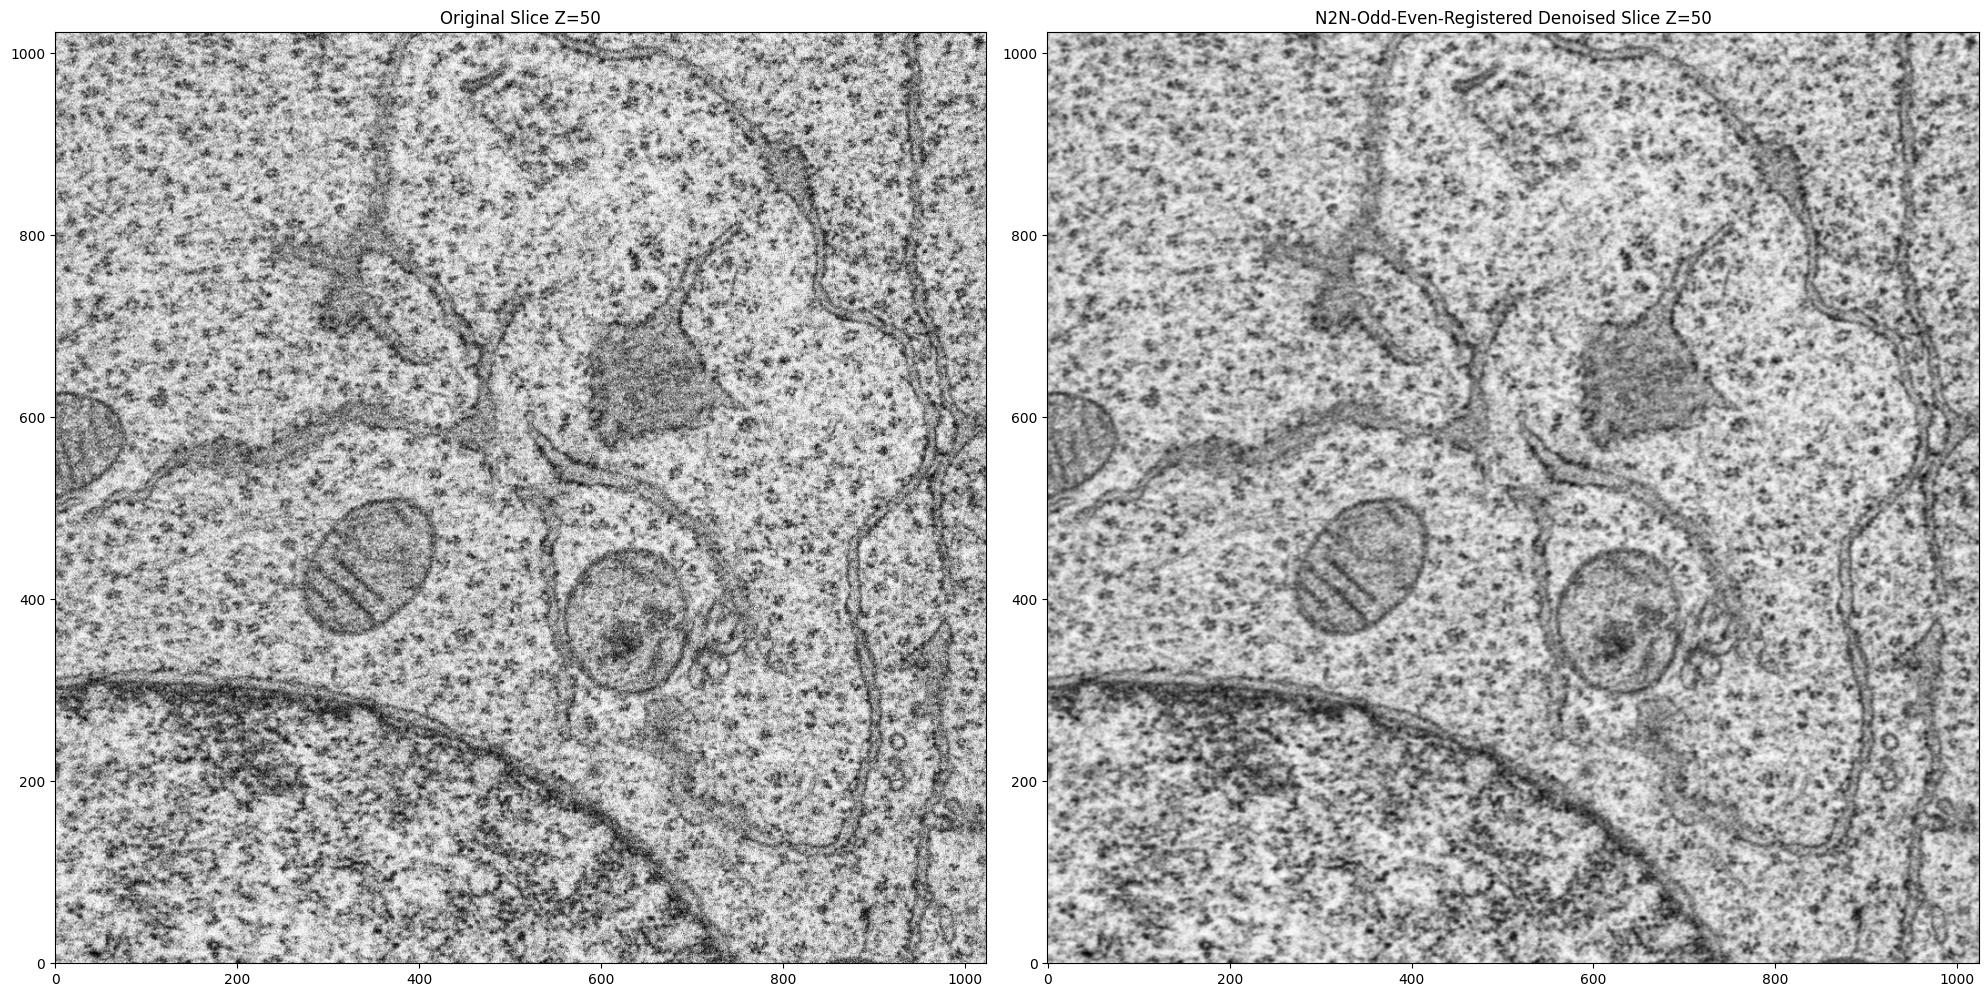

In [14]:
# Choose a slice index in the middle of the volume for a good comparison
slice_idx = original_vol.shape[0] // 2

fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Plot the original slice z
im1 = axes[0].imshow(original_vol[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[0].set_title(f'Original Slice Z={slice_idx}')
axes[0].grid(False)

# Plot the original slice z+1
im2 = axes[1].imshow(denoised_vol[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[1].set_title(f'N2N-Odd-Even-Registered Denoised Slice Z={slice_idx}')
axes[1].grid(False)

plt.tight_layout()
plt.show()

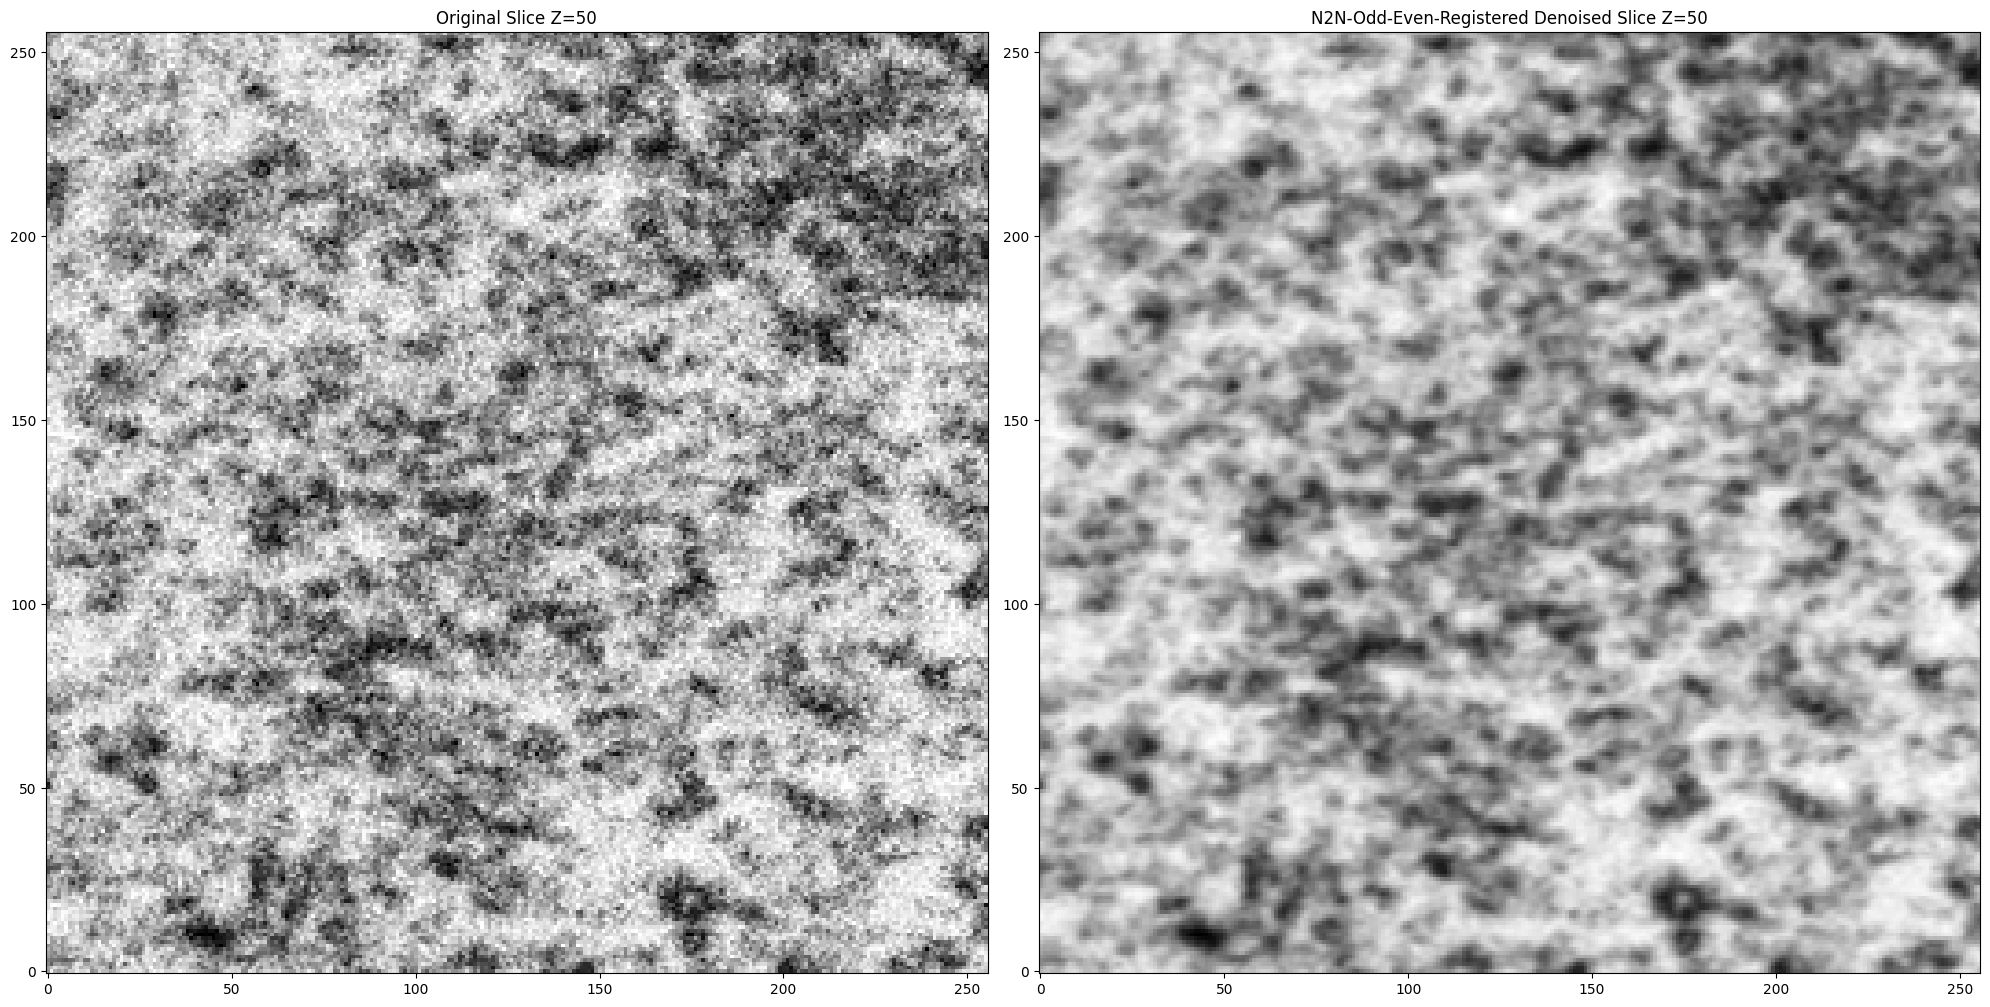

In [15]:
slice_idx = original_vol.shape[0] // 2

fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Plot the original slice z
im1 = axes[0].imshow(original_vol[slice_idx, :256, :256].T, cmap='gray', origin='lower')
axes[0].set_title(f'Original Slice Z={slice_idx}')
axes[0].grid(False)

# Plot the original slice z+1
im2 = axes[1].imshow(denoised_vol[slice_idx, :256, :256].T, cmap='gray', origin='lower')
axes[1].set_title(f'N2N-Odd-Even-Registered Denoised Slice Z={slice_idx}')
axes[1].grid(False)

plt.tight_layout()
plt.show()

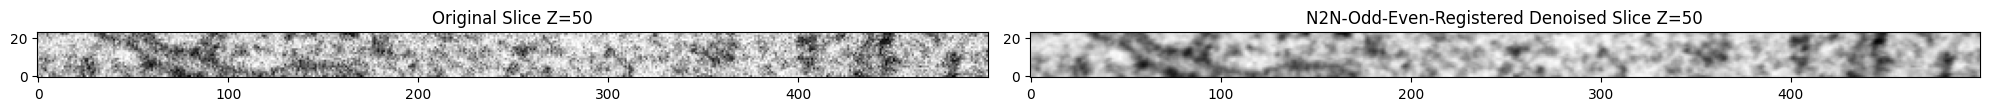

In [16]:
slice_idx = original_vol.shape[0] // 2

fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Plot the original slice z
im1 = axes[0].imshow(original_vol[slice_idx, 500:1000, 1000:1500].T, cmap='gray', origin='lower')
axes[0].set_title(f'Original Slice Z={slice_idx}')
axes[0].grid(False)

# Plot the original slice z+1
im2 = axes[1].imshow(denoised_vol[slice_idx, 500:1000, 1000:1500].T, cmap='gray', origin='lower')
axes[1].set_title(f'N2N-Odd-Even-Registered Denoised Slice Z={slice_idx}')
axes[1].grid(False)

plt.tight_layout()
plt.show()